<a href="https://colab.research.google.com/github/Spocklight/Fake_News_Detection/blob/master/Master_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Detección de noticias falsas</center></h1>
<h3><center>Alejandro Sierra Fernández</center></h3>
<h4><center>01/08/2022</center></h4>

*   <h2>Análisis exploratorio y preprocesado de datos</h2>

<font color='darkblue'> En este Notebook cargaremos los dos datasets que conforman la base de datos de noticias falsas "ISOT" y que contienen las noticias verdaderas y las noticias falsas con las que vamos a trabajar. Además, exploraremos estas bases de datos para después ir limpiando el cuerpo de las noticias y añadiendo variables que nos puedan ser de utilidad para los modelos que aplicaremos más adelante. </font>

<font color='darkblue'> Empezamos instalando e importando las librerías: </font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot  as plt

!pip install textacy
#!pip install spacy
#!pip install nltk
!pip install contractions
#!pip install wordcloud

import textacy
import spacy
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

from collections import Counter
from wordcloud import WordCloud
import contractions
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 17.8 MB/s 
     |████████████████████████████████| 1.6 MB 48.6 MB/s 
     |████████████████████████████████| 132 kB 40.2 MB/s 
     |████████████████████████████████| 2.0 MB 43.5 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=74012 sha256=f85382e040b46db467fd96e4b85ad8f43b061cc993be8579d5dca5ba77784408
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 25.9 MB/s 
     |████████████████████████████████| 106 kB 45.7 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<font color='darkblue'> Y descargamos las bases de datos desde Google Drive, al que accedemos a través del módulo "Mount" que nos ofrece Google Colab: </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_f="/content/drive/MyDrive/Fake_News/Fake.csv"
path_t="/content/drive/MyDrive/Fake_News/True.csv"

ISOT_Fake = pd.read_csv(path_f, encoding='latin-1')
ISOT_True = pd.read_csv(path_t, encoding='latin-1')

Mounted at /content/drive


Definimos una función para mejorar la visualización de los dataframes:

In [ ]:
def show_krows_df(df, numero_filas, cmap):                       
    return df.head(numero_filas).style.background_gradient(cmap = cmap)

In [ ]:
show_krows_df(ISOT_Fake.sample(40),3,'RdBu_r')

,title,text,subject,date
8763,Fox News Attacks Obamaâs National Cancer Initiative By Claiming Obamacare Wonât Cover It,"President Obama gave America a bit of the spirit of the 60 s back when he announced, during his final State of the Union address, his support for a new American moon shot to develop a cure for cancer. It harkened back to the days of John F. Kennedy s We choose to go to the Moon speech he delivered at Rice University in 1962, and Richard Nixon s signing of the National Cancer Act of 1971 where he dedicated federal funds towards working on a cure for the disease.A national goal to cure one of the worst and widespread diseases known to humanity is an incredible undertaking. If it were successful, it would save countless lives, ease untold amounts of suffering, and reduce the colossal expenses we incur by managing the disease every year. But, because Obama suggested it someone had to have a problem with it.For years now, there has been a running joke of If Obama is for it, Fox News hates it. This included such silly notions as drinking enough water every day, to breathing oxygen, and other common-interest items like these. Reality has overwritten satire yet again when Fox News insisted that Obama s national cancer cure initiative was a waste of time because Obamacare won t allow it to happen.One of the objectors was Dr. Marc Siegel, who appeared on Fox and Friends to declare that Obama was the wrong president to cure cancer. It was a strange way to start his argument, but the implication was clear. Some conservatives like Siegel just don t want to see Obama with a win even if it meant we could cure cancer starting tomorrow.Jumping immediately onto the anti-Obamacare bandwagon, Fox hosts started suggesting that the Affordable Care Act inhibits cancer research. This is something that is not proven true. Some trade groups have made the disingenuous leap connecting cost-saving measures to a reduction in research. However, there are other aspects of the ACA that promote more research across the board.Seigel continued on, implying that Barack Obama had not committed substantial funds to cancer research, by citing Richard Nixon directing $100 million towards cancer research during his presidency. Barack Obama has actually directed $264 million towards cancer research as part of a $2 billion raise to the National Institutes of Health.Seigel also claimed that the ACA wouldn t provide enough coverage for treatments developed during a national cancer initiative:Obamacare is narrow networks of doctors, he continued. It doesn t include most of these major medical centers, the cancer institutes. It won t include these treatments that are $100,000 per year. And not only that, as you just said, it stifles innovation.Source: Raw Story Seigel is trying to conflate the coverage of current treatments with cures that have not been invented. It s a bit disingenuous to suggest that a cure that has not actually been developed yet will not be covered by the ACA. Data on which insurance policies cover treatments that have yet to be invented simply do not exist.Seigel s argument about existing treatments does not have merit either. Media Matters had previously pointed out that conservative media had misrepresented the facts in an AP report about narrow health care networks to falsely claim enrollees in ACA exchanges cannot get coverage for treatments at advanced cancer centers. The narrow networks that were used as the basis for the right-wing misinformation was a marketing tactic to provide lower premium options to customers and had virtually nothing to do with the ACA forcing them into that position.Watch the full clip below:It s ridiculous that Fox News is actually fighting back against a national cancer cure initiative, simply because they can t let it go on Obamacare, but that is exactly what is happening. He already won on jobs, national security, ending wars, ensuring marriage equality, providing health insurance to tens of mill

In [ ]:
show_krows_df(ISOT_True.sample(40),3,'RdBu_r')

<font color='darkblue'> En una primera visualización de los datos nos damos cuenta problemas que pueden aparecer, como la presencia de noticias en blanco o la no deteción de las comillas, que no las reconoce como caracteres ascii. Estas son cuestiones que tendremos que resolver más adelante.

Vamos ahora a obtener datos como el número de noticias y columnas de los datasets o la presencia de elementos duplicados. </font>

In [ ]:
display(ISOT_Fake.dtypes)
print("Número de noticias falsas:", ISOT_Fake.text.count())

title      object
text       object
subject    object
date       object
dtype: object

Número de noticias falsas: 23481


In [ ]:
display(ISOT_True.dtypes)
print("Número de noticias verdaderas:", ISOT_True.text.count())

title      object
text       object
subject    object
date       object
dtype: object

Número de noticias verdaderas: 21417


In [ ]:
print("Número de noticias falsas únicas:", len(ISOT_Fake.text.unique()))
print("Número de noticias verdaderas únicas:", len(ISOT_True.text.unique()))

Número de noticias falsas únicas: 17455
Número de noticias verdaderas únicas: 21192


In [ ]:
print("Existen {} noticias falsas duplicadas".format(np.sum(ISOT_Fake.duplicated(subset=["text"])))) 
print("Existen {} noticias verdaderas duplicadas".format(np.sum(ISOT_True.duplicated(subset=["text"])))) 

Existen 6026 noticias falsas duplicadas
Existen 225 noticias verdaderas duplicadas


<font color='darkblue'> Eliminamos las instancias que tengan el cuerpo de la noticia duplicado. </font>


In [ ]:
ISOT_Fake = ISOT_Fake.drop_duplicates(subset=["text"], keep='first')
ISOT_True = ISOT_True.drop_duplicates(subset=["text"], keep='first')

<font color='darkblue'> <font color='darkblue'> Eliminamos las instancias que tengan el cuerpo de la noticia duplicado. </font> </font>

In [ ]:
print("Número de títulos de noticias falsas únicos:", len(ISOT_Fake.title.unique()))
print("Número de títulos noticias verdaderas únicos:", len(ISOT_True.title.unique()))

Número de títulos de noticias falsas únicos: 17450
Número de títulos noticias verdaderas únicos: 20821


In [ ]:
print("Existen {} títulos de noticias falsas duplicados".format(np.sum(ISOT_Fake.duplicated(subset=["title"])))) 
print("Existen {} títulos de noticias verdaderas duplicados".format(np.sum(ISOT_True.duplicated(subset=["title"])))) 

Existen 5 títulos de noticias falsas duplicados
Existen 371 títulos de noticias verdaderas duplicados


In [ ]:
ISOT_Fake = ISOT_Fake.drop_duplicates(subset=["title"], keep='first')
ISOT_True = ISOT_True.drop_duplicates(subset=["title"], keep='first')

<font color='darkblue'> Nos encargamos ahora de las noticias y los títulos que habíamos detectado que estaban vacías.</font>

In [ ]:
print("Hay {} valores vacíos en los titulos y {} valores vacíos en las noticias del dataset Fake".format(np.sum(ISOT_Fake.isnull())[0],
                                                                                                        np.sum(ISOT_Fake.isnull())[1]))

print("Hay {} valores vacíos en los titulos y {} valores vacíos en las noticias del dataset True".format(np.sum(ISOT_True.isnull())[0],
                                                                                                        np.sum(ISOT_True.isnull())[1]))

Hay 0 valores vacíos en los titulos y 0 valores vacíos en las noticias del dataset Fake
Hay 0 valores vacíos en los titulos y 0 valores vacíos en las noticias del dataset True


In [ ]:
print("Hay {} valores vacíos en los titulos y {} valores vacíos en las noticias del dataset Fake".format(np.sum(ISOT_Fake.applymap(lambda x: x == ' '))[0],
                                                                                                        np.sum(ISOT_Fake.applymap(lambda x: x == ' '))[1]))

print("Hay {} valores vacíos en los titulos y {} valores vacíos en las noticias del dataset True".format(np.sum(ISOT_True.applymap(lambda x: x == ' '))[0],
                                                                                                        np.sum(ISOT_True.applymap(lambda x: x == ' '))[1]))


Hay 0 valores vacíos en los titulos y 1 valores vacíos en las noticias del dataset Fake
Hay 0 valores vacíos en los titulos y 1 valores vacíos en las noticias del dataset True


<font color='darkblue'> Los títulos y noticias duplicadas que hemos eliminado anteriormente eran aquellas que estaban en blanco, definidas por *strings* en blanco y no por valores *null*. Al incluír como input de la función *drop_duplicates* el parámetro *keep='first'* hemos mantenido las primeras de esas instancias. Las eliminaremos dentro del pipeline que definiremos después para limpiar el cuerpo de las noticias. Estudiamos también la presencia de posibles valores *na*:</font>

In [ ]:
np.sum(ISOT_Fake.isna())

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
np.sum(ISOT_True.isna())

title      0
text       0
subject    0
date       0
dtype: int64

<font color='darkblue'> Estudiamos ahora la distribución de la columna subject en ambos datasets:</font>

News               51.856734
politics           36.796562
US_News             4.487106
left-news           3.914040
Government News     2.945559
Name: subject, dtype: float64

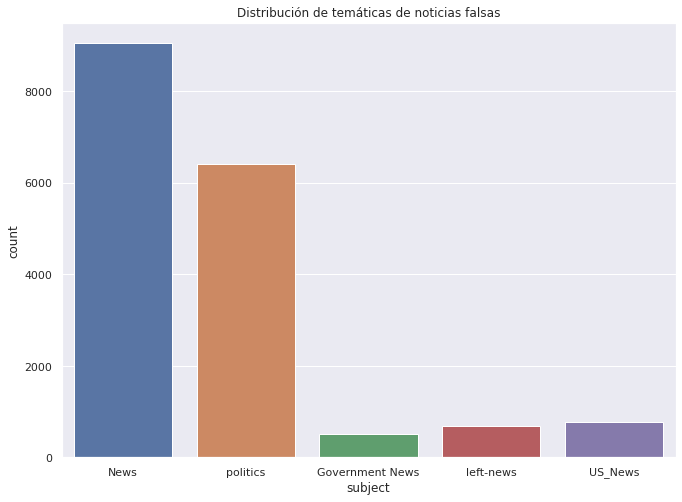

In [ ]:
display(ISOT_Fake["subject"].value_counts(normalize=True)*100)
sns.set(rc={'figure.figsize':(11.0,8.0)})
ax = sns.countplot(x="subject", data = ISOT_Fake).set(title='Distribución de temáticas de noticias falsas')

politicsNews    53.537294
worldnews       46.462706
Name: subject, dtype: float64

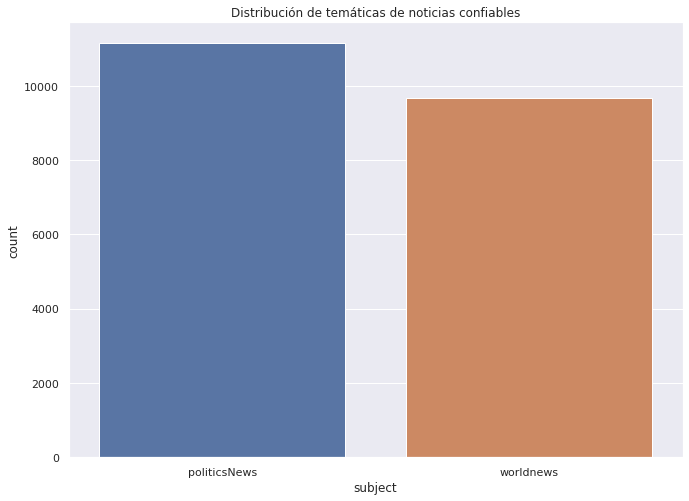

In [ ]:
display(ISOT_True["subject"].value_counts(normalize=True)*100)
ax = sns.countplot(x="subject", data = ISOT_True).set(title='Distribución de temáticas de noticias confiables')

<font color='darkblue'> Nos damos cuenta de que las categorías de la variable 'subject' son diferentes en ambos datasets. Esto hace que no podamos emplear esta variable en nuestros modelos, puesto que la recategorización de la misma no es intuitiva. 

Más adelante aplicaremos 'Topic Modelling' a nuestros datos, generando una nueva columna que podría sustituir a a 'subject'.</font>

<font color='darkblue'> En las siguientes celdas exploramos la longitud de los títulos: </n>

In [ ]:
ISOT = pd.concat([ISOT_Fake, ISOT_True], axis=0)
titles = [text for text in ISOT.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 38271
Max length of the titles: 43
Mean length of the titles: 11.942149408168065


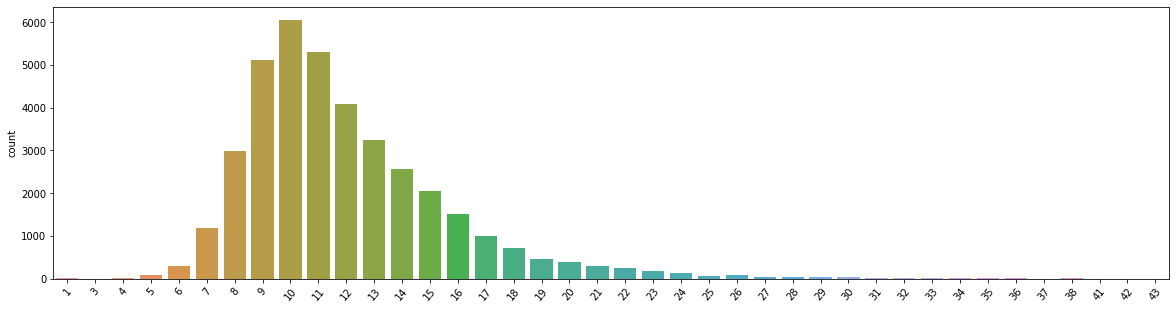

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [ ]:
texts = [text for text in ISOT.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 402.3758981996812


<font color='darkblue'> A continuación definimos algunas funiones que nos ayudarán a limpiar y simplificar el texto, solucionando problemas que habíamos detectado. </font>

In [ ]:
# Eliminar espacios:
def eliminar_espacios(text): 
    return  " ".join(text.split())   

# Convertir mayúsculas en minúsculas:
def texto_to_lower(text):
    return text.lower()

# Quitar comillas:
def eliminar_comillas(text):
    return re.sub('\'', ' ', text)

# Eliminar espacios dobles:
def eliminar_espacios_dobles(text):
    return re.sub(r'\s+', ' ', text)

# Eliminar los caracteres no printeables:
def non_ascii(text):
    return "".join([c for c in text if c.isascii()])

# Tokenizador:
from nltk import word_tokenize
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

#Reemplazar contracciones gramaticales:
def replace_contraction(text):
    expanded_words = []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = ' '.join(expanded_words) 
    return expanded_text

# Quitar stop words:
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence
##Con este comando extendemos la lista de stopwords
##stop_words.extend(['day', 'hotel', 'room', 'great', 'night','staff','service'])

#Eliminamos signos de puntuación:
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words

# Lemmatizaión:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return mytokens

In [ ]:
def preprocesado_fakenews(data):
    data = eliminar_espacios(data)
    data = texto_to_lower(data)
    data = replace_contraction(data)
    data = eliminar_comillas(data)
    data = eliminar_espacios_dobles(data)  
    data = non_ascii(data)
    data = tokenization(data)
    data = quitar_stopwords(data)
    data = quitar_puntuacion(data)
    data = lematizar(data)
    return data

In [ ]:
from tqdm.autonotebook import tqdm  #Función que importamos para ver la barra con el progreso 
tqdm.pandas()

ISOT_Fake['normaliza_text'] = ISOT_Fake["text"].progress_apply(lambda x: preprocesado_fakenews(x))
ISOT_True['normaliza_text'] = ISOT_True["text"].progress_apply(lambda x: preprocesado_fakenews(x))

  0%|          | 0/17450 [00:00<?, ?it/s]

  0%|          | 0/20821 [00:00<?, ?it/s]

In [ ]:
from tqdm.autonotebook import tqdm  #Función que importamos para ver la barra con el progreso 
tqdm.pandas()

ISOT_Fake['normaliza_title'] = ISOT_Fake["title"].progress_apply(lambda x: preprocesado_fakenews(x))
ISOT_True['normaliza_title'] = ISOT_True["title"].progress_apply(lambda x: preprocesado_fakenews(x))

  0%|          | 0/17450 [00:00<?, ?it/s]

  0%|          | 0/20821 [00:00<?, ?it/s]

In [ ]:
ISOT_Fake['clean_text'] = ISOT_Fake["normaliza_text"].progress_apply(lambda x: " ".join(x))
ISOT_True['clean_text'] = ISOT_True["normaliza_text"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/17450 [00:00<?, ?it/s]

  0%|          | 0/20821 [00:00<?, ?it/s]

In [ ]:
ISOT_Fake['clean_title'] = ISOT_Fake["normaliza_title"].progress_apply(lambda x: " ".join(x))
ISOT_True['clean_title'] = ISOT_True["normaliza_title"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/17450 [00:00<?, ?it/s]

  0%|          | 0/20821 [00:00<?, ?it/s]

<font color='darkblue'> Representamos gráficamente la lista con los tokens que aparecen con más frecuencia en los cuerpos de nuestras noticias: </font>

In [ ]:
list1 = ISOT_Fake["normaliza_text"].to_list()

lista_tokens = list()
for i in list1:
  lista_tokens.extend(i)

In [ ]:
dict_freq1 = Counter(lista_tokens)
dict_freq_order1 = sorted(dict_freq1.items(), key=lambda x: x[1], reverse=True)
token_names1 = list()
token_freqs1 = list()
for i in dict_freq_order1:
    if i[1] > 9500:
        token_names1.append(i[0])
        token_freqs1.append(i[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

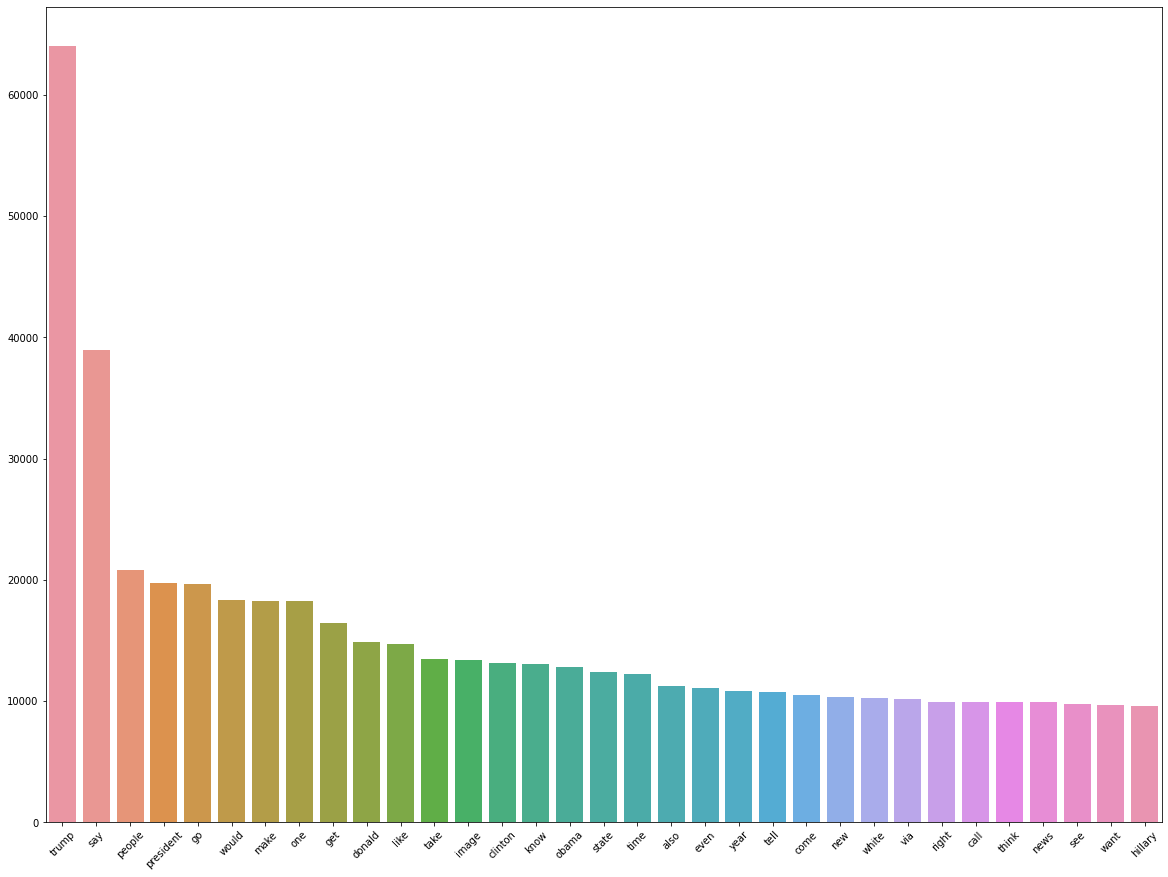

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
sns_g = sns.barplot(x=token_names1, y=token_freqs1)
plt.xticks(rotation=45)

In [ ]:
list2 = ISOT_True["normaliza_text"].to_list()

lista_tokens = list()
for i in list2:
  lista_tokens.extend(i)

In [ ]:
dict_freq2 = Counter(lista_tokens)
dict_freq_order2 = sorted(dict_freq2.items(), key=lambda x: x[1], reverse=True)
token_names2 = list()
token_freqs2 = list()
for i in dict_freq_order2:
    if i[1] > 9500:
        token_names2.append(i[0])
        token_freqs2.append(i[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

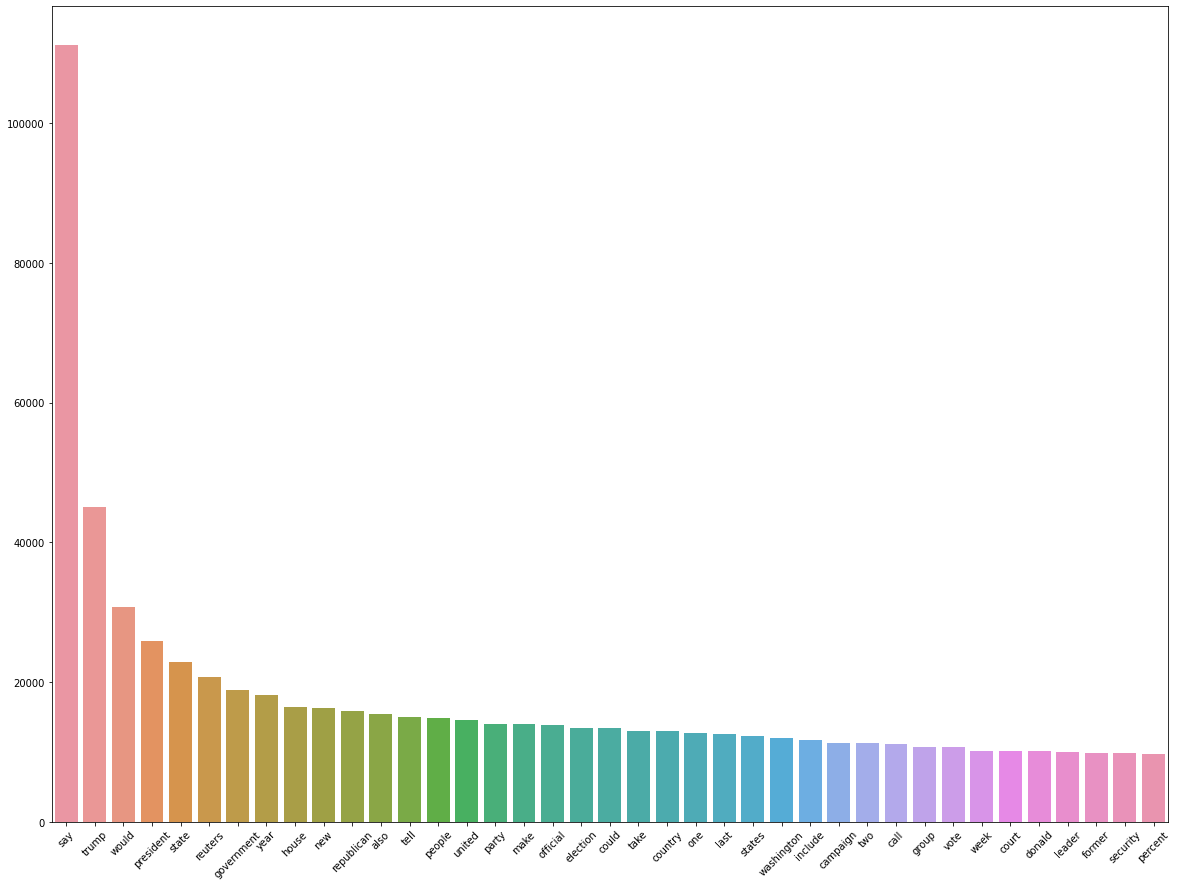

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
sns_g = sns.barplot(x=token_names2, y=token_freqs2)
plt.xticks(rotation=45)

<font color='darkblue'> Este tipo de representaciones son muy útiles para detectar palabras que aparecen con mucha frecuencia y que quizás no aporten demasiada información. Posteriormente, tendremos la posibilidad de añadirlas a nuestra lista de 'stopwords' si lo consideramos necesario.

Además, podemos analizar más diferencias que aparecen entre ambos datasets. Por poner un ejemplo, nombres propios de otros políticos y presidentes estadounidenses (Obama, Clinton, Hillary...) aparecen con mucha más frecuencia en noticias falsas que en verdaderas.</font>

<font color='darkblue'> Otras gráficas que son muy útiles para visualizar de forma directa y sencilla los términos que protagonizan nuestras noticias son las "*WordClouds*" que obtenemos a continuación:</font>

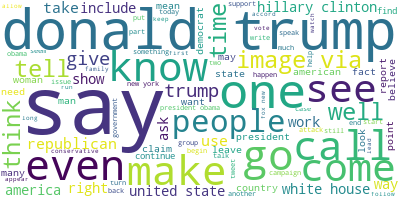

In [ ]:
long_string = ','.join(list(ISOT_Fake['clean_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

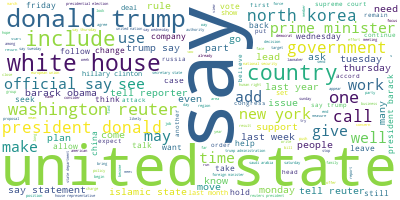

In [ ]:
long_string = ','.join(list(ISOT_True['clean_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

<font color='darkblue'> Vamos ahora a añadir nuevas variables y a estudiar sus distribuciones. Buscamos diferencias entre las distribuciones del dataset de noticias falsas y el dataset de noticias verdaderas, puesto que de darse resultarían variables muy aprovechables por los distintos modelos a la hora de mejorar la calidad de las predicciones. </font>

<font color='darkblue'> Empezamos por incluir la longitud de caracteres de las noticias y sus títulos: </font>

In [ ]:
ISOT_Fake["char_len_title"] = ISOT_Fake["title"].apply(lambda x: len(x))
ISOT_True["char_len_title"] = ISOT_True["title"].apply(lambda x: len(x))
ISOT_Fake["char_len_text"] = ISOT_Fake["text"].apply(lambda x: len(x))
ISOT_True["char_len_text"] = ISOT_True["text"].apply(lambda x: len(x))

ISOT_Fake["char_len_title_t"] = ISOT_Fake["clean_title"].apply(lambda x: len(x))
ISOT_True["char_len_title_t"] = ISOT_True["clean_title"].apply(lambda x: len(x))
ISOT_Fake["char_len_text_t"] = ISOT_Fake["clean_text"].apply(lambda x: len(x))
ISOT_True["char_len_text_t"] = ISOT_True["clean_text"].apply(lambda x: len(x))

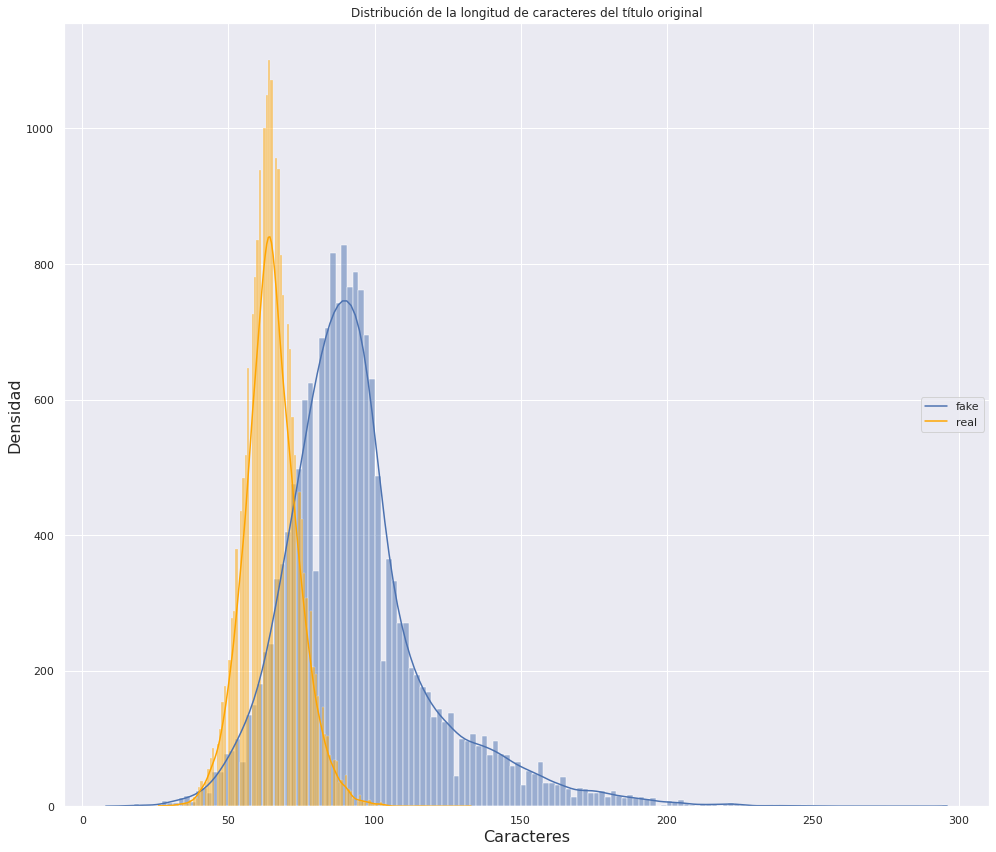

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.char_len_title, label="fake", kde=True)
sns.histplot(ISOT_True.char_len_title, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribución de la longitud de caracteres del título original')

# Finalmente mostramos el gráfico:
plt.tight_layout()
plt.show()

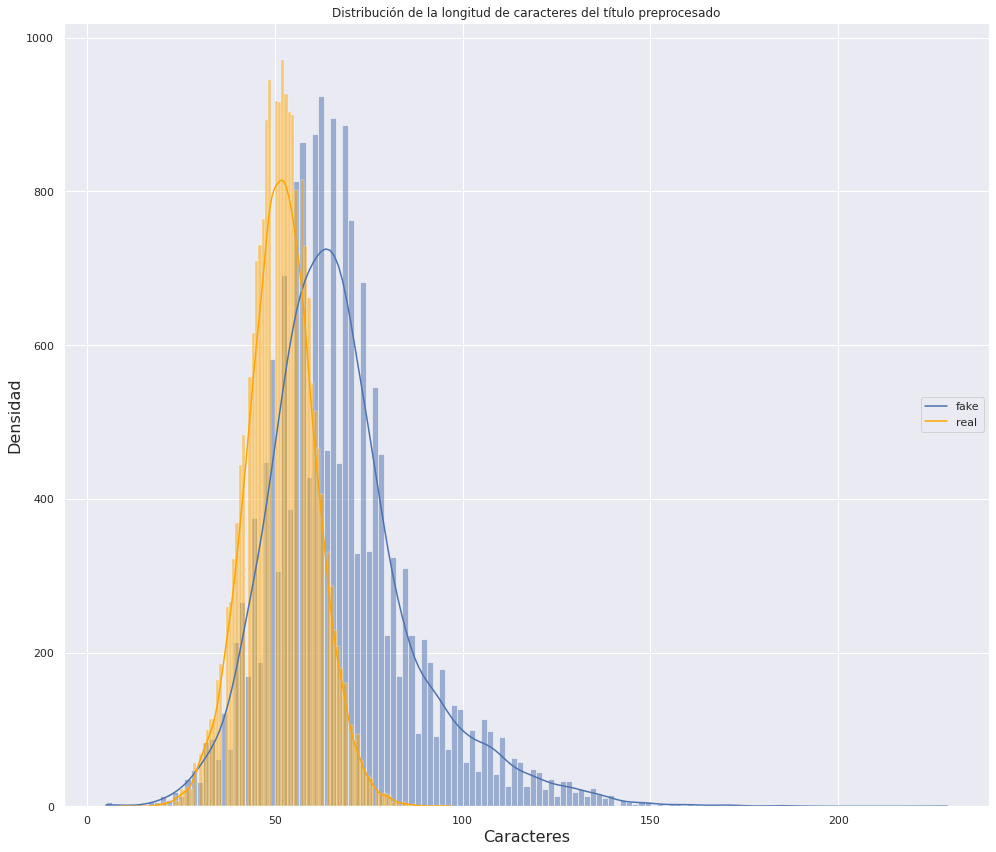

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.char_len_title_t, label="fake", kde=True)
sns.histplot(ISOT_True.char_len_title_t, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribución de la longitud de caracteres del título preprocesado')

# Finalmente mostramos el gráfico:
plt.tight_layout()
plt.show()

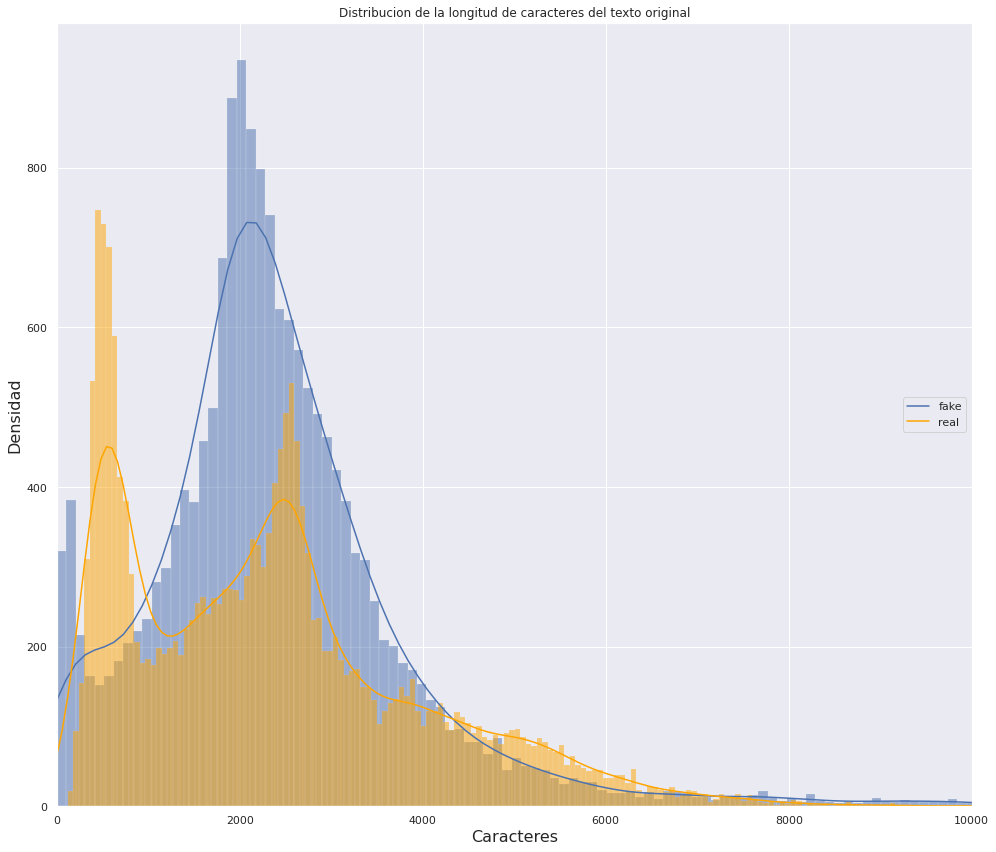

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.char_len_text, bins=500, kde_kws={'gridsize':500}, label="fake", kde=True)
sns.histplot(ISOT_True.char_len_text, bins=500, kde_kws={'gridsize':500}, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion de la longitud de caracteres del texto original')

#Vamos a obviar casos menos frecuentes de noticias con más de 1.000 caracteres para ver mejor la distribución:
plt.xlim([0, 10000])

# Finalmente mostramos el gráfico:
plt.tight_layout()
plt.show()

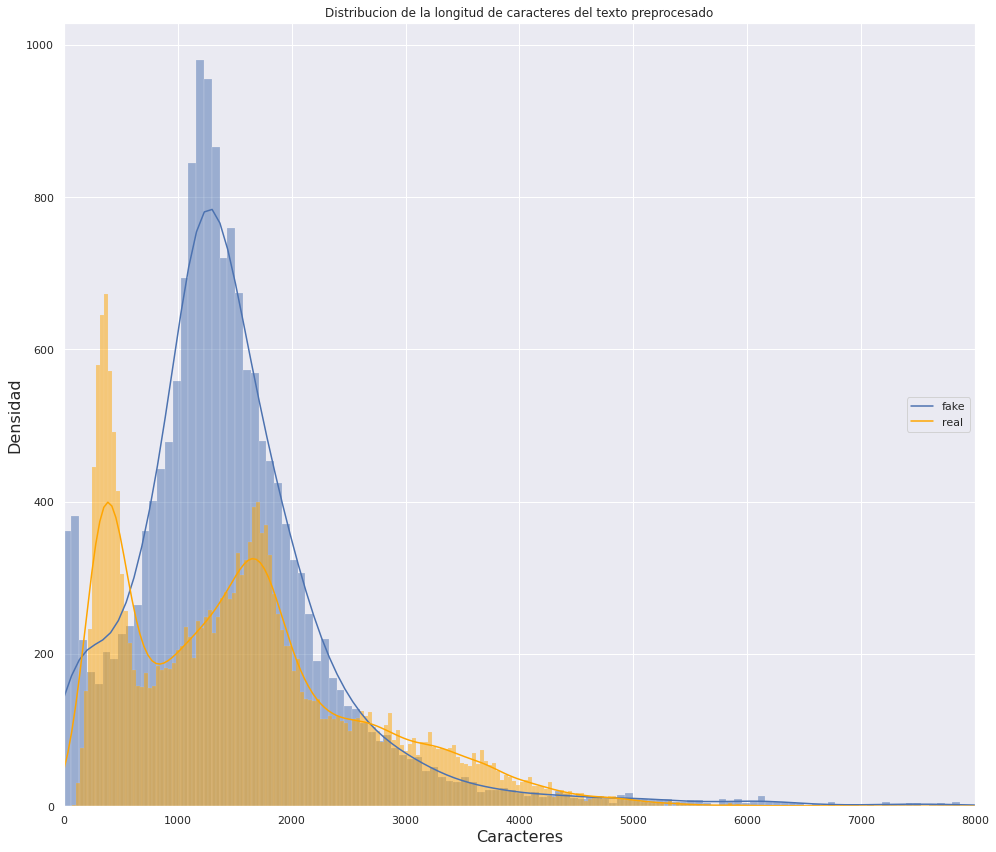

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.char_len_text_t, bins=500, kde_kws={'gridsize':500}, label="fake", kde=True)
sns.histplot(ISOT_True.char_len_text_t, bins=500, kde_kws={'gridsize':500}, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion de la longitud de caracteres del texto preprocesado')

#Vamos a obviar casos menos frecuentes de noticias con más de 1.000 caracteres para ver mejor la distribución:
plt.xlim([0, 8000])

# Finalmente mostramos el gráfico:
plt.tight_layout()
plt.show()

<font color='darkblue'> De momento vamos a mantener las variables que surgen tanto de los textos y títulos preprocesados como de los originales. Más adelante, sin embargo, elegiremos solamente una de ellas para entrenar a nuestros modelos. Esto es así porque las variables están práticamente duplicadas al proceder en su origen de la misma información. Elegiremos qué variables mantener dependiendo de las ligeras diferencias que aparezcan en sus distribuciones. Por ejemplo, en las variables que representan la longitud de caracteres de los títulos se ve que hay una mayor distinción entre los datasets *Fake* y *True* de los títulos originales que en los preprocesados. En este caso, por lo tanto, nos quedaríamos con la variable que surge de los títulos originales. </font>

In [ ]:
ISOT_Fake["token_text_len"] = ISOT_Fake["normaliza_text"].apply(lambda x: len(x))
ISOT_True["token_text_len"] = ISOT_True["normaliza_text"].apply(lambda x: len(x))

ISOT_Fake["token_title_len"] = ISOT_Fake["normaliza_title"].apply(lambda x: len(x))
ISOT_True["token_title_len"] = ISOT_True["normaliza_title"].apply(lambda x: len(x))

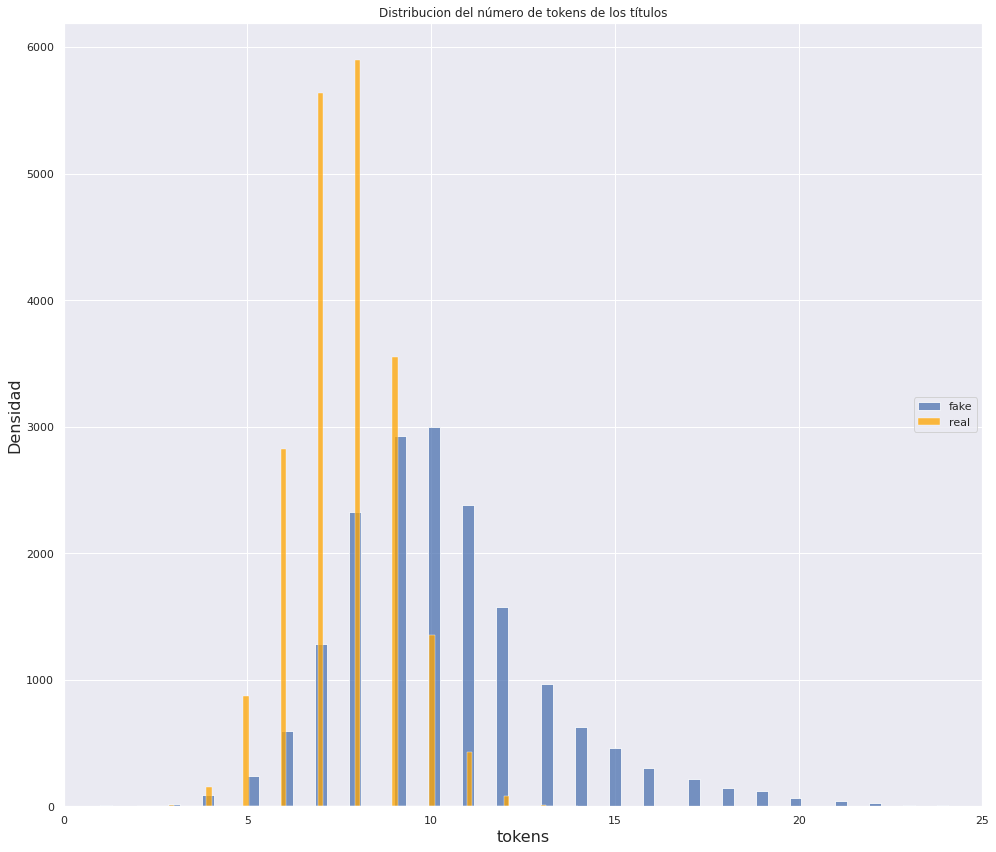

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.token_title_len, label="fake")
sns.histplot(ISOT_True.token_title_len, label="real", color='orange')
plt.legend(labels=['fake','real'], loc='center right')

plt.xlabel('tokens', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion del número de tokens de los títulos')

plt.xlim([0, 25])

plt.tight_layout()
plt.show()

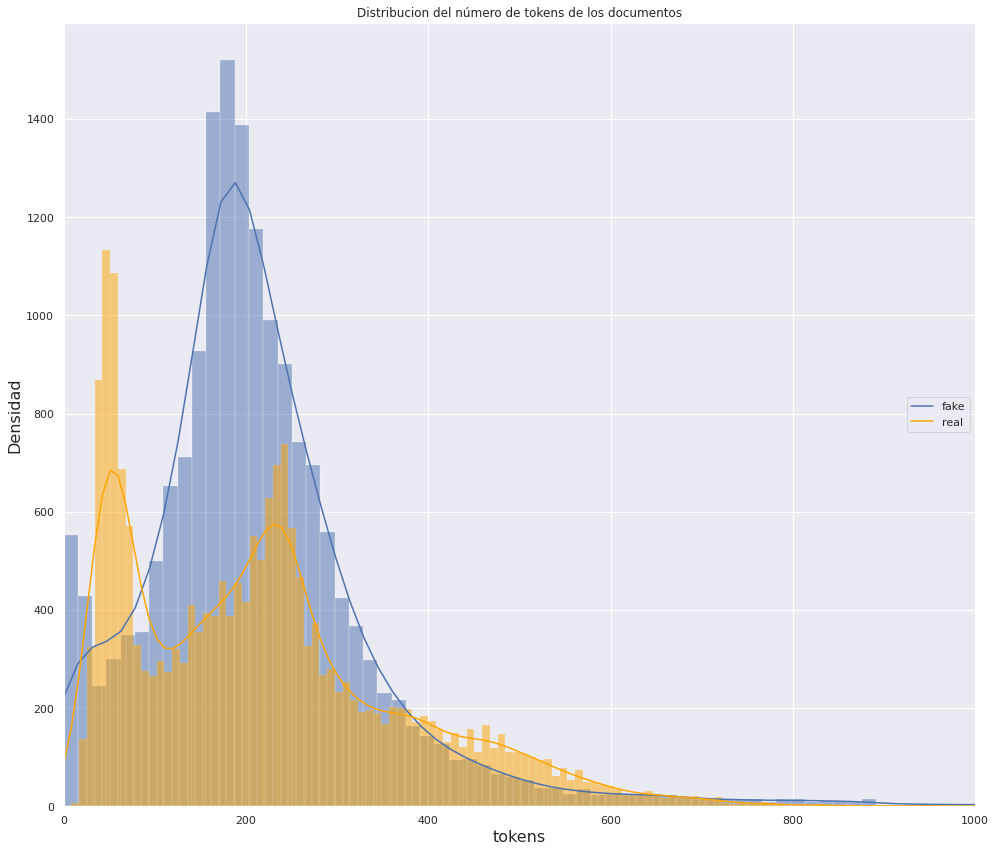

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.token_text_len,bins=300, kde_kws={'gridsize':300}, label="fake", kde=True)
sns.histplot(ISOT_True.token_text_len, bins=300, kde_kws={'gridsize':300}, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')

plt.xlabel('tokens', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion del número de tokens de los documentos')

plt.xlim([0, 1000])

plt.tight_layout()
plt.show()

<font color='darkblue'>Vamos ahora a definir una función con la que contaremos el número de mayúsculas que hay en cada noticia (cuerpo y título) y volvemos a analizar cómo es la distribuión de esta nueva variable. La función la aplicaremos sobre el texto original, puesto que dentro del pipeline que se aplicaba para obtener las variables *clean_text* y *clean_title* todas las letras a minúscula.</font>


In [ ]:
def count_upper_case_letters(str_obj):
    count = 0
    for elem in str_obj:
        if elem.isupper():
            count += 1
    return count

In [ ]:
ISOT_Fake["prop_uppercase_text"] = ISOT_Fake["text"].apply(lambda x: count_upper_case_letters(x)/len(x))
ISOT_Fake["prop_uppercase_title"] = ISOT_Fake["title"].apply(lambda x: count_upper_case_letters(x)/len(x))

ISOT_True["prop_uppercase_text"] = ISOT_True["text"].apply(lambda x: count_upper_case_letters(x)/len(x))
ISOT_True["prop_uppercase_title"] = ISOT_True["title"].apply(lambda x: count_upper_case_letters(x)/len(x))

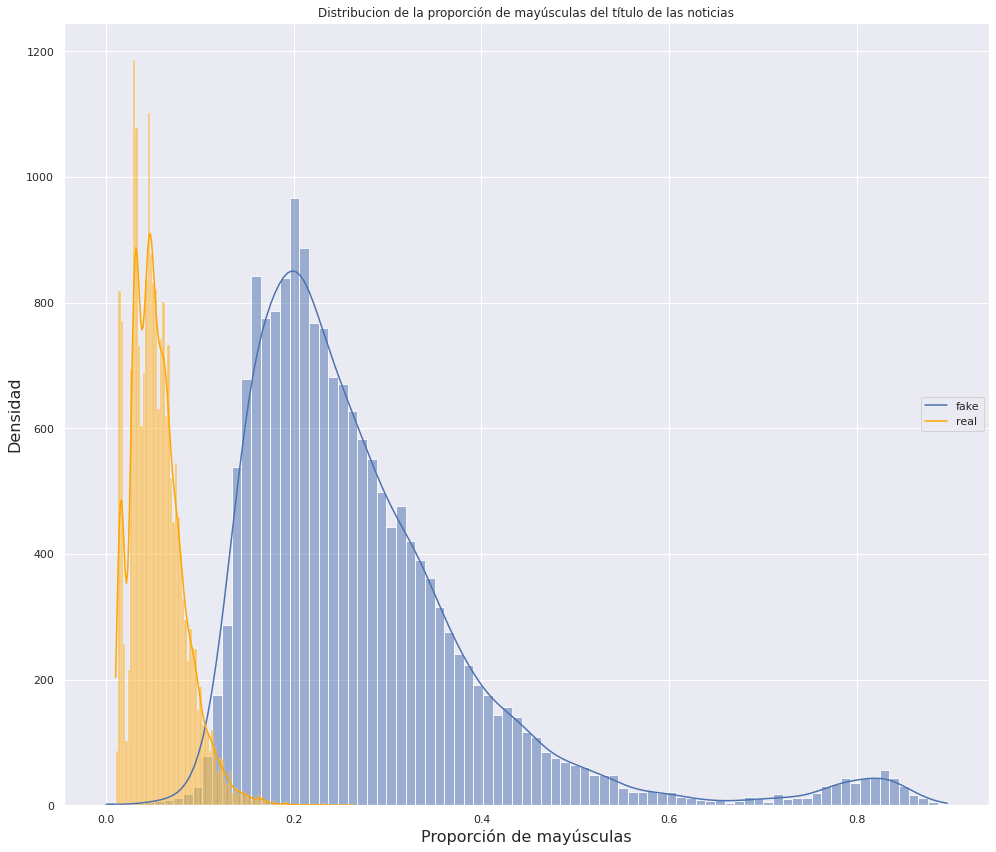

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.prop_uppercase_title, label="fake", kde=True)
sns.histplot(ISOT_True.prop_uppercase_title, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')

plt.xlabel('Proporción de mayúsculas', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion de la proporción de mayúsculas del título de las noticias')

plt.tight_layout()
plt.show()

<font color='darkblue'>Encontramos aquí una variable que puede resultar de bastante utilidad, puesto que las noticias están bastante bien diferenciadas con respecto a este parámetro. Veamos ahora la porporción de mayúsculas con respecto de los títulos:</font>

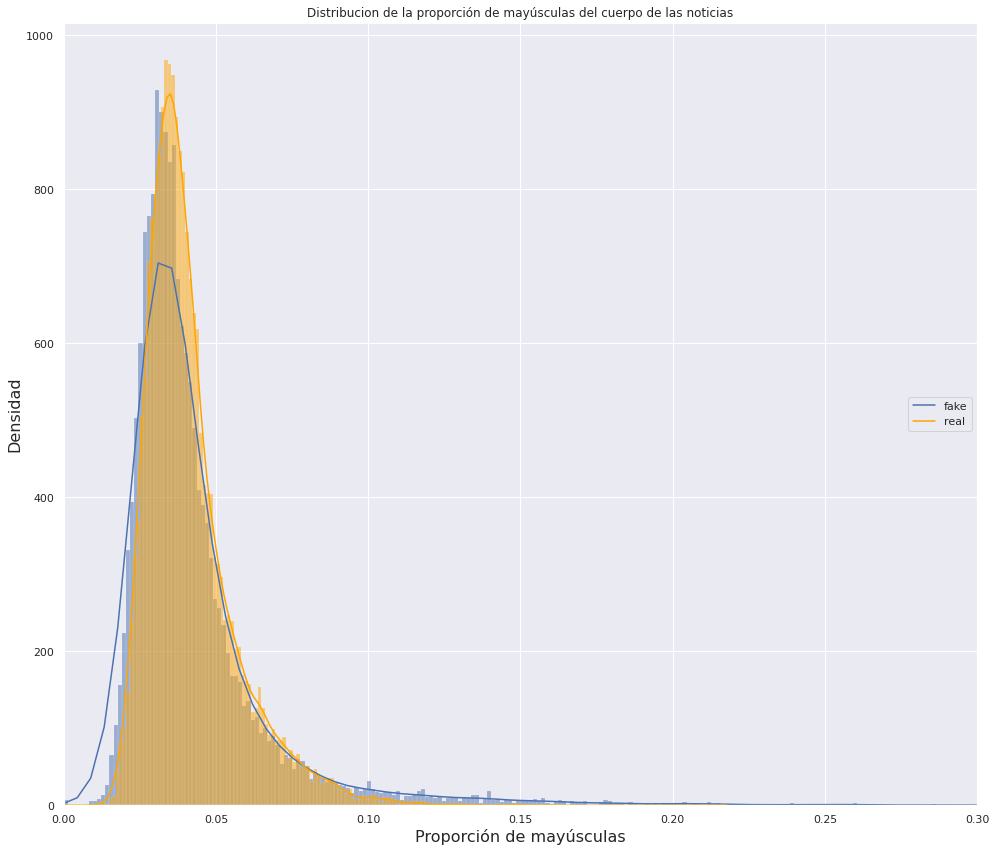

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.prop_uppercase_text, label="fake", kde=True)
sns.histplot(ISOT_True.prop_uppercase_text, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')

plt.xlabel('Proporción de mayúsculas', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion de la proporción de mayúsculas del cuerpo de las noticias')

plt.xlim([0, 0.3])

plt.tight_layout()
plt.show()

<font color='darkblue'>Finalmente definimos una función que obtenga la porporción de palabras de un string son superiores a un determinado valor, variable que puede resultar interesante.</font>

In [ ]:
def string_k(k, str):
     
    string = []
    text = str.split(" ")
    
    for x in text:
         x = ''.join([i for i in x if not i.isdigit()])
         x = re.sub(r'[^\w]', ' ', x)
         if len(x) > k:

             string.append(x)
             
    return len(set(string))/len(text)

In [ ]:
ISOT_Fake["prop_long_text"] = ISOT_Fake["clean_text"].apply(lambda x: string_k(7, x))
ISOT_Fake["prop_long_title"] = ISOT_Fake["clean_title"].apply(lambda x: string_k(6, x))

ISOT_True["prop_long_text"] = ISOT_True["clean_text"].apply(lambda x: string_k(7, x))
ISOT_True["prop_long_title"] = ISOT_True["clean_title"].apply(lambda x: string_k(6, x))

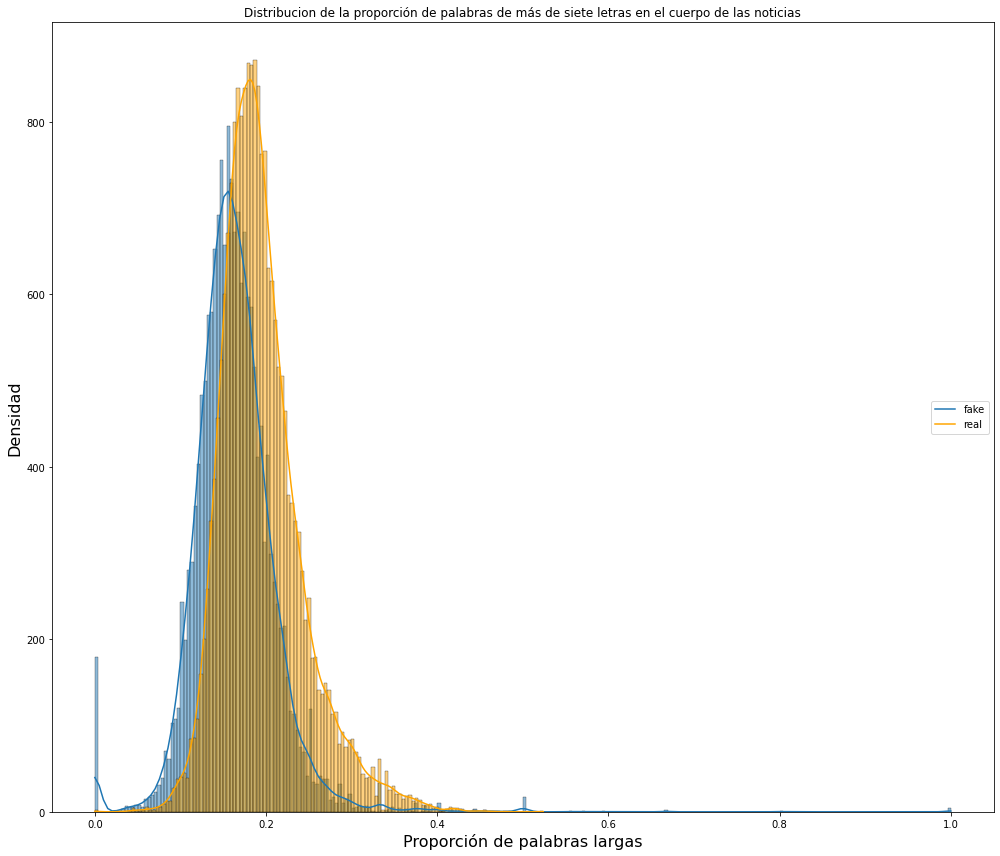

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.prop_long_text, label="fake", kde=True)
sns.histplot(ISOT_True.prop_long_text, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')

plt.xlabel('Proporción de palabras largas', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion de la proporción de palabras de más de siete letras en el cuerpo de las noticias')

#plt.xlim([0, 0.3])

plt.tight_layout()
plt.show()

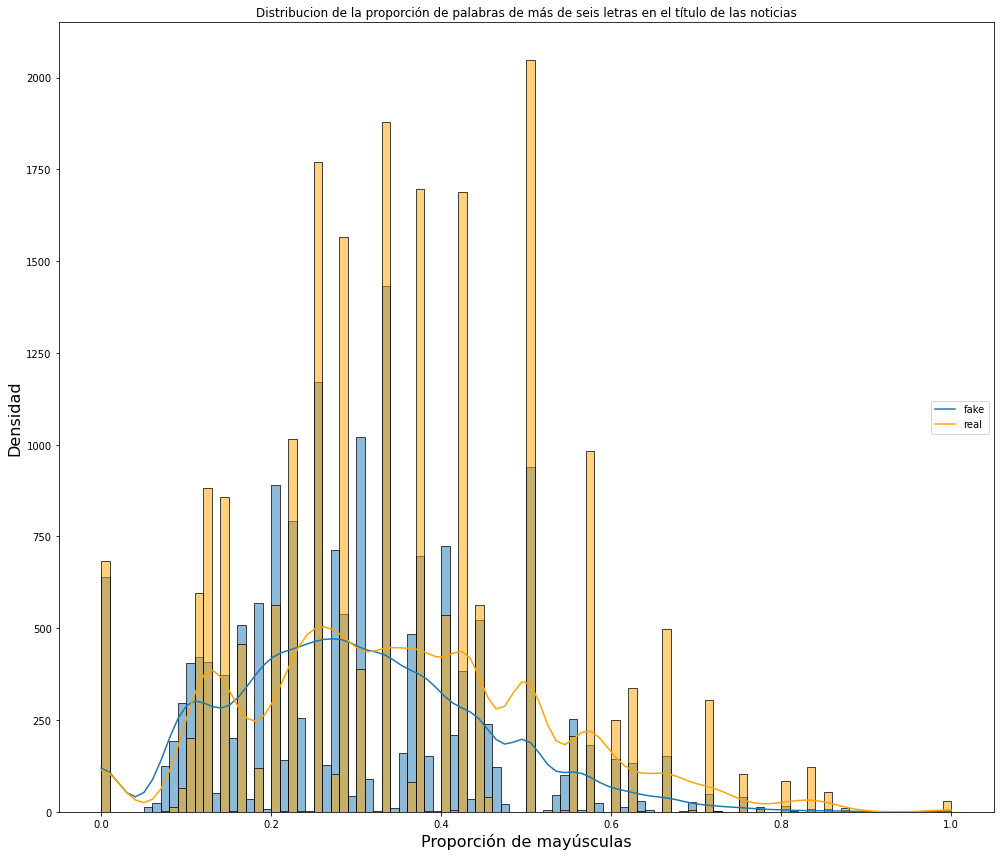

In [ ]:
fig = plt.figure(figsize=(14,12))

sns.histplot(ISOT_Fake.prop_long_title, bins=100, kde_kws={'gridsize':100}, label="fake", kde=True)
sns.histplot(ISOT_True.prop_long_title, bins=100, kde_kws={'gridsize':100}, label="real", color='orange', kde=True)
plt.legend(labels=['fake','real'], loc='center right')

plt.xlabel('Proporción de mayúsculas', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Distribucion de la proporción de palabras de más de seis letras en el título de las noticias')

#plt.xlim([0, 0.3])

plt.tight_layout()
plt.show()

<font color='darkblue'>Finalmente añadimos una categoría *target* a ambos dataframes que puede tomar los valores *True* o *Fake* y los unimos. Hacemos un *shuffle*, reseteamos los índices y guardamos el dataframe en el Drive empleando el método que se conoce como *pickling*. Empleamos este método en lugar de guardarlos como .csv porque de este modo mantenemos los tipos de las variables. </font>

In [ ]:
ISOT_Fake['target'] = 'Fake'
ISOT_True['target'] ='True'
ISOT = pd.concat([ISOT_Fake, ISOT_True], axis=0)

In [ ]:
ISOT = ISOT.sample(frac=1).reset_index(drop=True)
ISOT

,title,text,subject,date,normaliza_text,normaliza_title,clean_text,clean_title,char_len_title,char_len_text,char_len_title_t,char_len_text_t,token_text_len,token_title_len,prop_uppercase_text,prop_uppercase_title,prop_long_text,prop_long_title,target
0,China's graft watchdog warns officials over 'c...,BEIJING (Reuters) - Chinese officials trying t...,worldnews,"December 11, 2017","[beijing, reuters, chinese, official, try, hid...","[china, graft, watchdog, warn, official, conce...",beijing reuters chinese official try hide dish...,china graft watchdog warn official conceal ext...,68,2447,55,1583,224,7,0.015938,0.014706,0.187500,0.571429,True
1,Hurricane Irma may cut power to over 9 million...,(Reuters) - Hurricane Irma threatens to knock ...,worldnews,"September 8, 2017","[reuters, hurricane, irma, threaten, knock, po...","[hurricane, irma, may, cut, power, 9, million,...",reuters hurricane irma threaten knock power mi...,hurricane irma may cut power 9 million people ...,73,4471,61,3039,453,10,0.032431,0.041096,0.119205,0.400000,True
2,BREAKING! Wikileaksâ Julian Assange Explains...,Julian Assange met with John Pilger of Dartmou...,politics,"Nov 4, 2016","[julian, assange, meet, john, pilger, dartmout...","[break, wikileak, julian, assange, explain, tr...",julian assange meet john pilger dartmouth film...,break wikileak julian assange explain trump wi...,170,764,115,485,67,18,0.061518,0.235294,0.194030,0.277778,Fake
3,"SUNDAY SCREENING: Guns, Drugs & the CIA (1988)","This week s documentary screening, curated by ...",US_News,"April 2, 2017","[week, documentary, screening, curate, editori...","[sunday, screening, gun, drug, cia, 1988]",week documentary screening curate editorial te...,sunday screening gun drug cia 1988,46,645,34,440,59,6,0.151938,0.434783,0.288136,0.166667,Fake
4,Suspected U.S. drone strike targets militants ...,"PARACHINAR/PESHAWAR, Pakistan (Reuters) - A su...",worldnews,"September 15, 2017","[pakistan, reuters, suspect, drone, strike, ki...","[suspect, drone, strike, target, militant, pak...",pakistan reuters suspect drone strike kill thr...,suspect drone strike target militant pakistan ...,81,2159,67,1451,199,9,0.048170,0.049383,0.170854,0.555556,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38266,Indian Hindu tried to raise money with video o...,NEW DELHI (Reuters) - A Hindu man in India tri...,worldnews,"December 14, 2017","[new, delhi, reuters, hindu, man, india, try, ...","[indian, hindu, try, raise, money, video, kill...",new delhi reuters hindu man india try raise mo...,indian hindu try raise money video kill muslim...,73,1918,53,1270,195,9,0.036496,0.041096,0.097436,0.000000,True
38267,Ben Carson Outwits Dimwits On The Viewâ¦A MUS...,The progressive dimwits on The View proved tod...,left-news,"Oct 6, 2015","[progressive, dimwit, view, prove, today, matc...","[ben, carson, outwit, dimwit, viewa, must, watch]",progressive dimwit view prove today match bril...,ben carson outwit dimwit viewa must watch,54,1842,41,1058,153,7,0.025516,0.240741,0.176471,0.000000,Fake
38268,Wheelbarrow bomb kills man pushing it in Somal...,"BOSSASO, SOMALIA S (Reuters) - A wheelbarrow e...",worldnews,"October 24, 2017","[bossaso, somalia, reuters, wheelbarrow, explo...","[wheelbarrow, bomb, kill, man, push, somalia, ...",bossaso somalia reuters wheelbarrow explode ou...,wheelbarrow bomb kill man push somalia puntlan...,73,598,58,424,60,9,0.048495,0.041096,0.133333,0.333333,True
38269,Millions to lose health insurance under Republ...,WASHINGTON (Reuters) - Millions of Americans w...,politicsNews,"March 13, 2017","[washington, reuters, million, americans, woul...","[million, lose, health, insurance, republican,...",washington reuters million americans would los...,million lose health insurance republican plan ...,77,443,66,324,42,8,0.054176,0.025974,0.285714,0.500000,True


In [ ]:
import pickle                                  
path = '/content/drive/MyDrive/Fake_News/'
pickle_out = open(path + 'ISOT_pickle', 'wb')
pickle.dump(ISOT, pickle_out)
pickle_out.close()